#### Simplified and modified from the PyTorch tutorial available here:

https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html#creating-the-network

In [1]:
from io import open
import glob
import os

In [2]:
print(glob.glob('datasets/data/names/*.txt'))

['datasets/data/names/Vietnamese.txt', 'datasets/data/names/Arabic.txt', 'datasets/data/names/German.txt', 'datasets/data/names/Czech.txt', 'datasets/data/names/Russian.txt', 'datasets/data/names/English.txt', 'datasets/data/names/Chinese.txt', 'datasets/data/names/Spanish.txt', 'datasets/data/names/Irish.txt', 'datasets/data/names/Dutch.txt', 'datasets/data/names/Greek.txt', 'datasets/data/names/French.txt', 'datasets/data/names/Italian.txt', 'datasets/data/names/Portuguese.txt', 'datasets/data/names/Korean.txt', 'datasets/data/names/Polish.txt', 'datasets/data/names/Scottish.txt', 'datasets/data/names/Japanese.txt']


In [3]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

all_letters

"abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'"

In [4]:
n_letters

57

#### Build the language_names dictionary, a list of names per language

In [5]:
language_names = {}

all_languages = []

#### Read a file and split into lines

Turn a Unicode string to plain ASCII (may alter the meaning of words)
https://stackoverflow.com/questions/517923/what-is-the-best-way-to-remove-accents-in-a-python-unicode-string/518232#518232

In [6]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [7]:
print(unicodeToAscii('Émile'))

Emile


In [8]:
def findFiles(path): 
    return glob.glob(path)

In [9]:
total_names = 0

for filename in findFiles('datasets/data/names/*.txt'):
    
    language = os.path.splitext(os.path.basename(filename))[0]
    
    all_languages.append(language)
    
    read_names = open(filename, encoding='utf-8').read().strip().split('\n')
    
    names = [unicodeToAscii(line) for line in read_names]
    
    language_names[language] = names
    
    total_names += len(names)

#### There are 18 languages to which a name can be classified into

In [10]:
language_names

{'Vietnamese': ['Nguyen',
  'Tron',
  'Le',
  'Pham',
  'Huynh',
  'Hoang',
  'Phan',
  'Vu',
  'Vo',
  'Dang',
  'Bui',
  'Do',
  'Ho',
  'Ngo',
  'Duong',
  'Ly',
  'An',
  'an',
  'Bach',
  'Banh',
  'Cao',
  'Chau',
  'Chu',
  'Chung',
  'Chu',
  'Diep',
  'Doan',
  'Dam',
  'Dao',
  'Dinh',
  'Doan',
  'Giang',
  'Ha',
  'Han',
  'Kieu',
  'Kim',
  'La',
  'Lac',
  'Lam',
  'Lieu',
  'Luc',
  'Luong',
  'Luu',
  'Ma',
  'Mach',
  'Mai',
  'Nghiem',
  'Phi',
  'Pho',
  'Phung',
  'Quach',
  'Quang',
  'Quyen',
  'Ta',
  'Thach',
  'Thai',
  'Sai',
  'Thi',
  'Than',
  'Thao',
  'Thuy',
  'Tieu',
  'To',
  'Ton',
  'Tong',
  'Trang',
  'Trieu',
  'Trinh',
  'Truong',
  'Van',
  'Vinh',
  'Vuong',
  'Vuu'],
 'Arabic': ['Khoury',
  'Nahas',
  'Daher',
  'Gerges',
  'Nazari',
  'Maalouf',
  'Gerges',
  'Naifeh',
  'Guirguis',
  'Baba',
  'Sabbagh',
  'Attia',
  'Tahan',
  'Haddad',
  'Aswad',
  'Najjar',
  'Dagher',
  'Maloof',
  'Isa',
  'Asghar',
  'Nader',
  'Gaber',
  'Abboud',
  '

In [11]:
all_languages

['Vietnamese',
 'Arabic',
 'German',
 'Czech',
 'Russian',
 'English',
 'Chinese',
 'Spanish',
 'Irish',
 'Dutch',
 'Greek',
 'French',
 'Italian',
 'Portuguese',
 'Korean',
 'Polish',
 'Scottish',
 'Japanese']

In [23]:
n_languages = len(all_languages)
n_languages

18

In [12]:
total_names

20074

Now we have language_names, a dictionary mapping each category (language) to a list of lines (names). 

In [62]:
print(language_names)

{'Vietnamese': ['Nguyen', 'Tron', 'Le', 'Pham', 'Huynh', 'Hoang', 'Phan', 'Vu', 'Vo', 'Dang', 'Bui', 'Do', 'Ho', 'Ngo', 'Duong', 'Ly', 'An', 'an', 'Bach', 'Banh', 'Cao', 'Chau', 'Chu', 'Chung', 'Chu', 'Diep', 'Doan', 'Dam', 'Dao', 'Dinh', 'Doan', 'Giang', 'Ha', 'Han', 'Kieu', 'Kim', 'La', 'Lac', 'Lam', 'Lieu', 'Luc', 'Luong', 'Luu', 'Ma', 'Mach', 'Mai', 'Nghiem', 'Phi', 'Pho', 'Phung', 'Quach', 'Quang', 'Quyen', 'Ta', 'Thach', 'Thai', 'Sai', 'Thi', 'Than', 'Thao', 'Thuy', 'Tieu', 'To', 'Ton', 'Tong', 'Trang', 'Trieu', 'Trinh', 'Truong', 'Van', 'Vinh', 'Vuong', 'Vuu'], 'Arabic': ['Khoury', 'Nahas', 'Daher', 'Gerges', 'Nazari', 'Maalouf', 'Gerges', 'Naifeh', 'Guirguis', 'Baba', 'Sabbagh', 'Attia', 'Tahan', 'Haddad', 'Aswad', 'Najjar', 'Dagher', 'Maloof', 'Isa', 'Asghar', 'Nader', 'Gaber', 'Abboud', 'Maalouf', 'Zogby', 'Srour', 'Bahar', 'Mustafa', 'Hanania', 'Daher', 'Tuma', 'Nahas', 'Saliba', 'Shamoon', 'Handal', 'Baba', 'Amari', 'Bahar', 'Atiyeh', 'Said', 'Khouri', 'Tahan', 'Baba', 'Mus

#### Turning Names into Tensors

Represent each name in one-hot encoded form (1 for the position of the letter, 0 elsewhere)

To make a word we join a bunch of those into a 2D matrix <line_length x 1 x n_letters>.
That extra 1 dimension is because PyTorch assumes everything is in batches - we're just using a batch size of 1 here.

In [15]:
import torch

In [16]:
def letterToTensor(letter):
    
    tensor = torch.zeros(1, n_letters)
    tensor[0][all_letters.find(letter)] = 1
    
    return tensor

In [17]:
print(letterToTensor('a'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])


In [28]:
print(letterToTensor('Z'))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0.]])


In [13]:
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    
    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1
    
    return tensor

In [19]:
mary_tensor = nameToTensor('Mary')

mary_tensor.size()


torch.Size([4, 1, 57])

In [20]:
mary_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [21]:
import torch.nn as nn

class RNN(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        
        hidden = self.i2h(combined)
        
        output = self.i2o(combined)
        output = self.softmax(output)
        
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [25]:
n_hidden = 256

rnn = RNN(n_letters, n_hidden, n_languages)

#### Manually testing the network

In [26]:
inp = letterToTensor('C')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inp, hidden)

print('output size =', output.size())
print('next_hidden size =', next_hidden.size())

output size = torch.Size([1, 18])
next_hidden size = torch.Size([1, 256])


we can see the output is a < 1 x n_categories >

In [27]:
inp = nameToTensor('Charron')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inp[0], hidden)

In [28]:
print(output)

tensor([[-2.8588, -2.9890, -2.9064, -2.8552, -2.8594, -2.8804, -2.8285, -2.8627,
         -2.8729, -2.9659, -2.8634, -2.9597, -2.9374, -2.8008, -2.9305, -2.8022,
         -2.9571, -2.9236]], grad_fn=<LogSoftmaxBackward0>)


In [29]:
print(next_hidden)

tensor([[ 6.9377e-02,  6.9443e-02,  1.5033e-02,  5.0495e-03, -5.1603e-02,
         -3.0612e-04,  9.8759e-02,  2.9364e-02, -5.2589e-02,  3.8139e-02,
         -8.8449e-02, -3.7035e-02,  6.0725e-02, -6.7454e-02, -8.3625e-02,
          3.3739e-02, -6.7409e-02,  3.7716e-02,  2.0668e-03, -2.0646e-02,
          4.8826e-02, -6.0965e-02, -2.6667e-02, -1.9737e-02, -5.5209e-02,
          7.9600e-02, -1.5173e-02,  8.2466e-02,  5.7330e-02, -2.0365e-02,
         -2.4430e-03, -1.1986e-02, -7.7797e-02,  4.6474e-02,  4.2708e-02,
         -6.9755e-02,  3.2388e-02, -2.6623e-02, -1.6402e-02,  2.1690e-02,
         -3.2086e-02,  1.7979e-02, -2.6773e-02, -8.0930e-02, -8.7834e-02,
          7.0939e-02, -9.9595e-03,  1.1019e-01, -2.9785e-02,  4.2834e-02,
          7.5432e-02,  2.6643e-02, -2.6027e-02, -3.9575e-02,  2.5185e-02,
          3.3576e-02,  2.0129e-02, -2.0736e-02, -9.4645e-03,  2.5034e-02,
         -1.8453e-02,  4.7665e-02,  2.3963e-02,  1.4428e-02, -4.2276e-02,
         -1.0703e-02, -6.1554e-02,  6.

#### Preparing for Training

We  make a few helper functions  the first one is to interpret the output of the network, which we know to be a likelihood of each language. We can use Tensor.topk to get the index of the greatest value

In [24]:
def languageFromOutput(output):
    
    _, top_i = output.topk(1)
    
    language_i = top_i[0].item()
    
    return all_languages[language_i], language_i

In [30]:
print(languageFromOutput(output))

('Portuguese', 13)


We will also want a quick way to get a training example (a name and its language)

In [31]:
import random

def randomTrainingExample():
    
    random_language_index = random.randint(0, n_languages - 1)
    language = all_languages[random_language_index]
    
    random_language_names = language_names[language]
    
    name = random_language_names[random.randint(0, len(random_language_names) - 1)]
    
    language_tensor = torch.tensor([all_languages.index(language)], dtype=torch.long)
    name_tensor = nameToTensor(name)
    
    return language, name, language_tensor, name_tensor

In [32]:
for i in range(10):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    print('language =', language, ', name =', name)

language = Greek , name = Belesis
language = Polish , name = Slazak
language = Vietnamese , name = Kieu
language = Vietnamese , name = Dinh
language = French , name = Bonhomme
language = Czech , name = Janutka
language = Japanese , name = Miyazawa
language = Dutch , name = Seelen
language = Italian , name = Guttuso
language = Portuguese , name = Santiago


#### Training the Network

In [36]:
criterion = nn.NLLLoss()
learning_rate = 0.005 

Each loop of training will:

- Create input and target tensors
- Create a zeroed initial hidden state
- Read each letter in and
- Keep hidden state for next letter
- Compare final output to target
- Back-propagate
- Return the output and loss

In [37]:
def train(langauge_tensor, name_tensor):
    
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    loss = criterion(output, langauge_tensor)
    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item()

Now we just have to run that with a bunch of examples. Since the train function returns both the output and loss we can print its guesses and also keep track of loss for plotting. Since there are 1000s of examples we print only every print_every examples, and take an average of the loss.

In [34]:
n_iters = 200000

current_loss = 0
all_losses = []

- Get a random training input and target
- Print iter number, loss, name and guess
- Add current loss avg to list of losses

In [39]:
for epoch in range(1, n_iters + 1):
    
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    output, loss = train(language_tensor, name_tensor)
    current_loss += loss

    if epoch % 5000 == 0:
        guess, guess_i = languageFromOutput(output)
        correct = '✓' if guess == language else '✗ (%s)' % language
        
        print('%d %d%% %.4f %s / %s %s' % (epoch, 
                                           epoch / n_iters * 100,
                                           loss,
                                           name, 
                                           guess, 
                                           correct))

    if epoch % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

5000 2% 2.0702 Gok / Korean ✗ (Chinese)
10000 5% 0.3152 Okura / Japanese ✓
15000 7% 0.0011 Moraitopoulos / Greek ✓
20000 10% 0.9455 Sardelis / Greek ✓
25000 12% 2.0836 Sleiman / Czech ✗ (Arabic)
30000 15% 0.5883 Newman / English ✓
35000 17% 0.8222 Dagher / Arabic ✓
40000 20% 3.4747 Michel / Irish ✗ (French)
45000 22% 0.0336 Ricchetti / Italian ✓
50000 25% 3.8208 Keir / Scottish ✗ (English)
55000 27% 2.4019 Kwak / Polish ✗ (Korean)
60000 30% 2.0889 Solos / Greek ✗ (Spanish)
65000 32% 0.3139 Piatek / Polish ✓
70000 35% 2.9499 Rompa / Czech ✗ (Dutch)
75000 37% 1.0251 Shi / Korean ✗ (Chinese)
80000 40% 0.0333 Kanegawa / Japanese ✓
85000 42% 0.9742 Song / Korean ✗ (Chinese)
90000 45% 2.7500 Durante / Italian ✗ (Spanish)
95000 47% 0.7623 Geracimos / Greek ✓
100000 50% 0.6451 Rim / Korean ✓
105000 52% 2.8468 Keefe / German ✗ (Irish)
110000 55% 0.3063 Cathasach / Irish ✓
115000 57% 3.2352 Mazza / Portuguese ✗ (Italian)
120000 60% 3.3270 Rosales / Dutch ✗ (Spanish)
125000 62% 1.4190 Viola / Spa

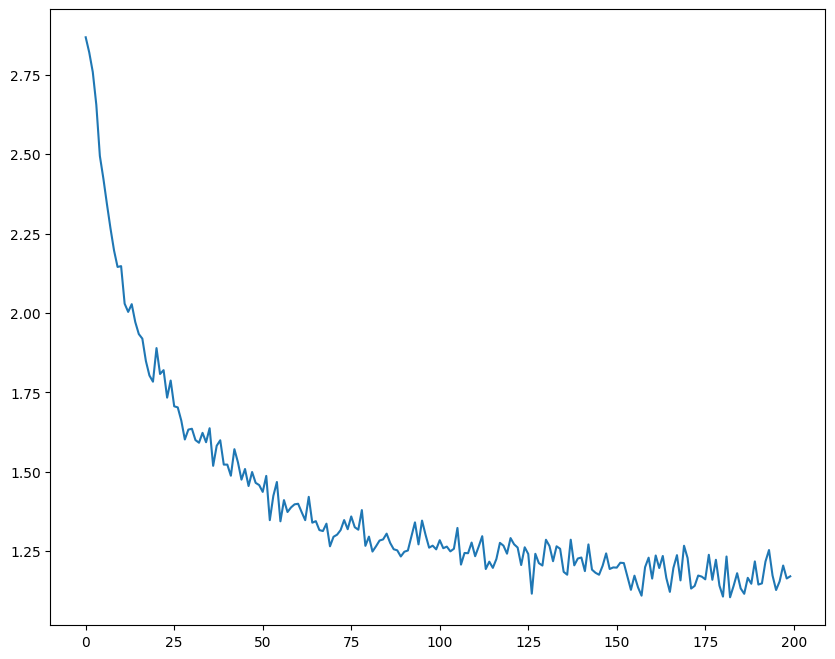

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(all_losses)
plt.show()

#### Running on User Input

In [47]:
n_predictions = 3

In [58]:
input_name = 'Akash' #Re-run for 'Amaya' and 'Bukoski'

In [59]:
with torch.no_grad():
    
    name_tensor = nameToTensor(input_name)
    
    hidden = rnn.initHidden()
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)

    topv, topi = output.topk(n_predictions, 1, True)

    for i in range(n_predictions):
        
        value = topv[0][i].item()
        language_index = topi[0][i].item()
        
        print('(%.2f) %s' % (value, all_languages[language_index]))

(-0.11) Arabic
(-3.40) Japanese
(-3.50) German
